In [1]:
"""Importing the libraries"""
import numpy as np
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import csv
from scipy.stats import ttest_ind #to run the t-test for independent samples
from scipy import stats
from scipy.stats import spearmanr
import scipy.stats as stats

diet_data = pd.read_csv('C:/Users/shams/OneDrive/Documents/Julia_intro_to_stat_analysos/Diet.csv')
diet_data.head()


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [2]:
'''adding an extra column which calculates weightloss '''

weightloss_diet = diet_data.assign(weight_loss = diet_data['pre.weight'] -
                                   diet_data['weight6weeks'])
weightloss_diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


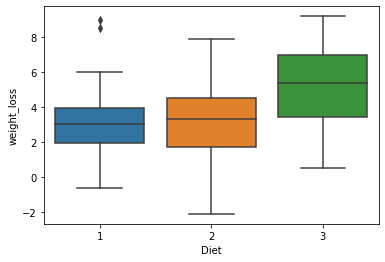

In [3]:
"""By using the graphical tools, can you illustrate whether the weight loss is
different among the different levels of diet? (Hint: weight loss can be calculated
as “pre.weight”-“weight6weeks”)"""
data_boxplot = sns.boxplot(x= weightloss_diet['Diet'], 
                           y = weightloss_diet['weight_loss'])


In [9]:
"""From the boxplot we can see that the means of Diet1 and Diet level2 are quite similar while the weight loss is
significant for the group3 diet. We can also see some outliers for the Diet group 1."""
correlation = weightloss_diet.corr()
print(correlation.head())

              Person       Age    Height  pre.weight      Diet  weight6weeks  \
Person      1.000000 -0.101773 -0.033696    0.296399  0.942237      0.196728   
Age        -0.101773  1.000000  0.080393   -0.006265 -0.127707      0.010472   
Height     -0.033696  0.080393  1.000000    0.154381 -0.118241      0.183998   
pre.weight  0.296399 -0.006265  0.154381    1.000000  0.039234      0.958449   
Diet        0.942237 -0.127707 -0.118241    0.039234  1.000000     -0.048050   

            weight_loss  
Person         0.325260  
Age           -0.058049  
Height        -0.115765  
pre.weight     0.066495  
Diet           0.302208  


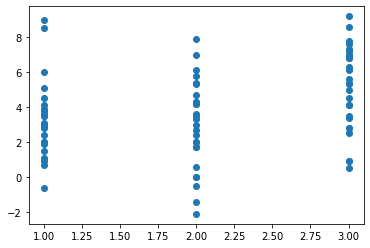

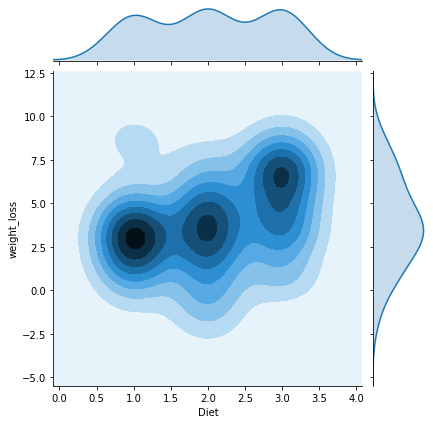

In [21]:
""". Do you think the “gender” might moderate the relationship between “Diet” and
weight loss. You could use graphical tools to explore this. """
"""In order to find relationship between the gender with weigh loss and Diet we plot scatter plot"""

#sns.regplot(weightloss_diet['Age'],weightloss_diet['weight_loss'])
plt.scatter(weightloss_diet['Diet'],weightloss_diet['weight_loss'])
sns.jointplot(weightloss_diet['Diet'],weightloss_diet['weight_loss'], kind = 'kde')

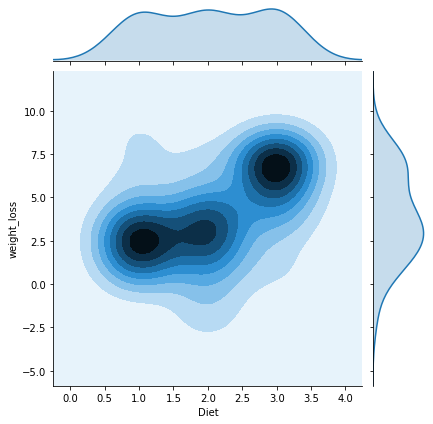

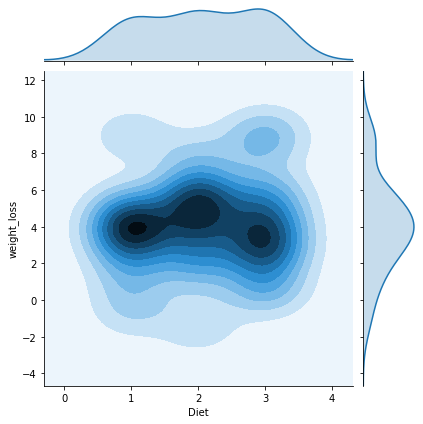

In [22]:
"""From the scatter and jointplot we can see that Diet_losses the densest area for group 1 and group2 Diet is between
2 to 5. For the group 3 diet the densest area is at 5 to 7.5"""

"""In order to find if gender plays a role in moderating the two variables we sort the data set"""
"""dividing the data group by gender"""
Female = weightloss_diet[weightloss_diet['gender']=='0']
Male = weightloss_diet[weightloss_diet['gender']=='1']
sns.jointplot(Female['Diet'],Female['weight_loss'], kind = 'kde')
sns.jointplot(Male['Diet'],Male['weight_loss'], kind = 'kde')

In [ ]:
"""The top 1st plot is the joint plot for females and the second plot is for females"""
"""From the plots we can see that the gender usualy dont moderate the relation between the diet and weight loss
though there is slight difference in the relationship suggesting that that p value might be close to 0.05 but greater"""

In [31]:
""" dividing the diet group to A,B and C"""
A = weightloss_diet[weightloss_diet['Diet']==1]
B = weightloss_diet[weightloss_diet['Diet']==2]
C = weightloss_diet[weightloss_diet['Diet']==3]
"""t test to weighloss and diet levels"""
print(ttest_ind(A['weight_loss'], B['weight_loss'], nan_policy='omit'))

"""we get a p value of 0.68 which is greater then the significance value
denoting that weight loss is not different among A and B level of diet"""

print(ttest_ind(B['weight_loss'], C['weight_loss'], nan_policy='omit'))

"""We can see a p-value of 0.0025 denoting the fact that there is weigh loss
difference between weigh loss group B and C"""
print(ttest_ind(A['weight_loss'], C['weight_loss'], nan_policy='omit'))

"""We can see a p-value of 0.0066 denoting the fact that there is weight loss
difference between weigh loss group A and C """


Ttest_indResult(statistic=0.40797824323257154, pvalue=0.6850668861405854)
Ttest_indResult(statistic=-3.1693496673045676, pvalue=0.0025599026452984013)
Ttest_indResult(statistic=-2.834783037306771, pvalue=0.006644381649741192)


In [35]:
"""We perform anova test to check whether weight loss is different for different level of diet"""
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Diet~weight_loss', data = weightloss_diet).fit()
aov = sm.stats.anova_lm(mod, type=2)
"""If we addgender as blocking factor """
mod1 = ols('Diet~weight_loss+gender', data = weightloss_diet).fit()
aov1 = sm.stats.anova_lm(mod1, type=2)

print(aov)
print(aov1)

               df     sum_sq   mean_sq         F    PR(>F)
weight_loss   1.0   4.647263  4.647263  7.638673  0.007164
Residual     76.0  46.237352  0.608386       NaN       NaN
               df     sum_sq   mean_sq         F    PR(>F)
gender        2.0   0.029083  0.014542  0.023401  0.976878
weight_loss   1.0   4.870231  4.870231  7.837224  0.006524
Residual     74.0  45.985301  0.621423       NaN       NaN


In [ ]:
"""We can see from the p values that for the anova testing between weightloss and different levels of diet we see a p value
of 0.007 which is closer and less then 0.005, so we can say there is no significant but a slight correlation between weight
loss with the """

"""But if we add the gender as a blocking factor we can see that the p value is 0.97 which is much greater then the
significant value 0.05 hence denoting the fact that gender does not moderate any relation between the weight and
diet variables"""

In [37]:
mod2 = ols('Diet~gender', data = weightloss_diet).fit()
aov2 = sm.stats.anova_lm(mod2, type=2)
print(aov2)

            df     sum_sq   mean_sq         F    PR(>F)
gender     2.0   0.029083  0.014542  0.021446  0.978789
Residual  75.0  50.855532  0.678074       NaN       NaN


In [ ]:
"""The p-value for the ANOVA for the gender and diet is 0.97 which is greater then the significant value 0.05. Hence, 
denoting that gender doesnot have any interaction with the Diet which we can also see from the visual representation from
problem2""" 